### Recursion 种类

* Linear Recursion -- with one recursive call per function instantiation 一次递归过程最多调用一次
  + Tail Recursion --  at most one recursive call per call, and it's the last thing evaluated.
  + 绝大多数递归都是尾递归，即递归是运行的最后一步（前面是basic情况）
* Tree Recursion
  + 多次调用，指数型增长

* 例：定义函数 find_zero(lowest, highest, func) 判断在 lowest 和 highest 之间是否存在 x 使 func(x) == 0

其中 func() 是一个单调增加的函数

In [ ]:
## 1. 尾递归 (也是线性递归), 用头指针判断, 每次递归头指针的位置
def find_zero(lowest, highest, func):
    if lowest > highest:
        return None
    elif func(lowest) == 0:
        return lowest
    else:
        return find_zero(lowest + 1, highest, func)

## 2. 尾递归 (也是线性递归), 二分
def find_zero(lowest, highest, func):
    if lowest > highest:
        return None

    middle = (lowest + highest) // 2
    if func(middle) == 0:
        return middle
    elif func(middle) < 0:
        return find_zero(middle + 1, highest, func)
    else:
        return find_zero(lowest, middle - 1, func)

## 3. 线性递归，不是尾递归
# 因为在 func(middle)<0 但 is_a_zero() 为 False 时还会检查下一步 func(middle)>0
# 即执行递归并不一定是最后一个操作
def is_a_zero(lowest, highest, func):
    middle = (lowest + highest) // 2
    return lowest <= highest \
        and (func(middle) == 0 \
            or func(middle) < 0 and is_a_zero(middle+1, highest, func) \
            or func(middle) > 0 and is_a_zero(lowest, middle-1, func)  )
# 不用显式的 if 判断
# "艺术" :)


### Recursion 迭代转为循环的（自动）优化

1. 比如对于上面例题的第一种递归方式, 我们可以把它写成迭代（循环）版本 iterative program

经过处理的编译器可以在编译运行时自动在内部进行结构上的重构优化，Loop 循环要快于递归

In [ ]:
#-----------------------------------------------------+
def find_zero(lowest, highest, func):
    if lowest > highest:
        return None
    elif func(lowest) == 0:
        return lowest
    else:
        return find_zero(lowest + 1, highest, func)
#-----------------------------------------------------+
# 可以形式上转化为
#-----------------------------------------------------+
def func():...
while lowest <= highest:
    middle = (lowest + highest) // 2
    if func(middle) == 0:
        print(middle)
        break
    elif func(middle) < 0:
        lowest = middle + 1
    else:
        highest = middle - 1
#-----------------------------------------------------+


1. 更一般的，任何尾递归都可以理论形式上转化为循环格式

如下给出了尾递归的各个部分转化为迭代器的写法

尽管 Python，Java，JavaScript 中并不会做这样的优化，但在 language scheme 中，一个完整的语言方案可以在编译时做这样的智能优化

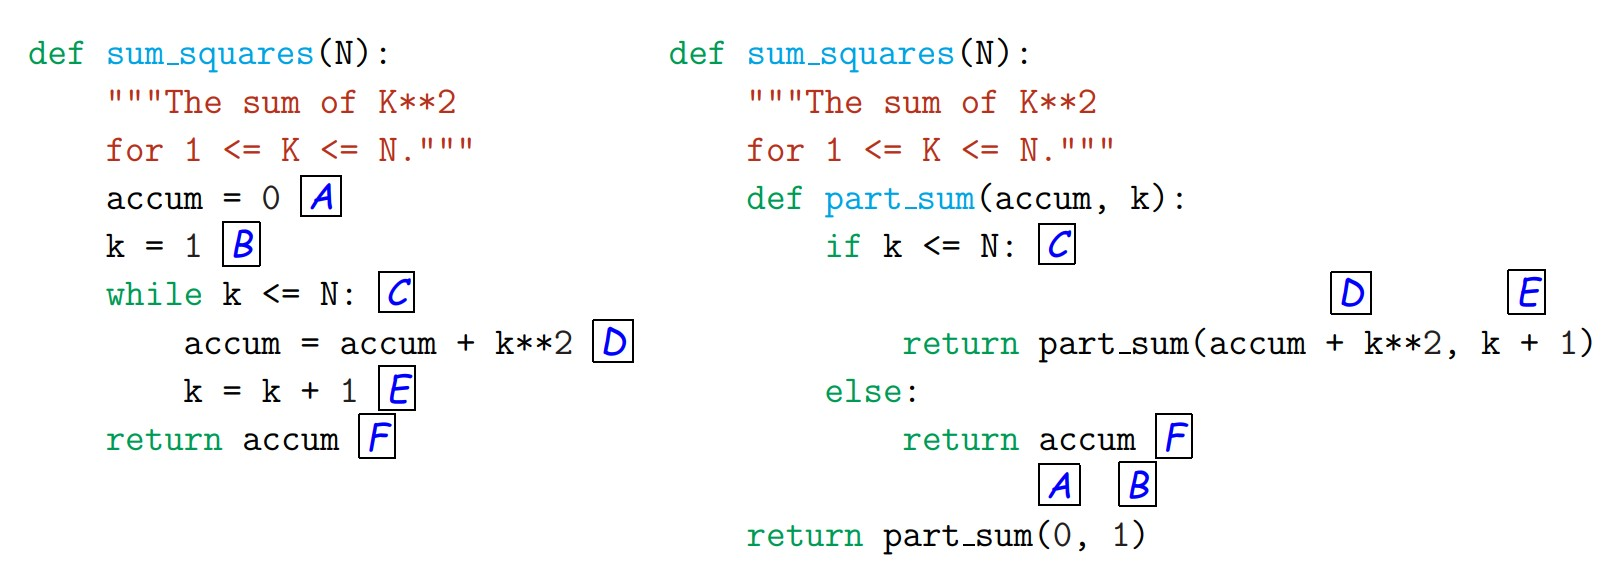